# Feature visualization

Empirical analysis of useful features in pretrained models through visualization

## Imports

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models.feature_extraction import create_feature_extractor

from torchvision.ops import FeaturePyramidNetwork

import torchvision.transforms as transforms

import torch
import torch.nn as nn

from tqdm import tqdm

## Default ResNet50 backbone

In [3]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

layer_names = []

for name, layer in model.named_modules():
    if isinstance(layer, nn.Conv2d):
        layer_names += [name]

print(layer_names)

feature_extractor = create_feature_extractor(model, 
        return_nodes=["layer1.1.conv1", "layer2.0.conv1", "layer3.0.conv1", "layer4.0.conv1"])

['conv1', 'layer1.0.conv1', 'layer1.0.conv2', 'layer1.0.conv3', 'layer1.0.downsample.0', 'layer1.1.conv1', 'layer1.1.conv2', 'layer1.1.conv3', 'layer1.2.conv1', 'layer1.2.conv2', 'layer1.2.conv3', 'layer2.0.conv1', 'layer2.0.conv2', 'layer2.0.conv3', 'layer2.0.downsample.0', 'layer2.1.conv1', 'layer2.1.conv2', 'layer2.1.conv3', 'layer2.2.conv1', 'layer2.2.conv2', 'layer2.2.conv3', 'layer2.3.conv1', 'layer2.3.conv2', 'layer2.3.conv3', 'layer3.0.conv1', 'layer3.0.conv2', 'layer3.0.conv3', 'layer3.0.downsample.0', 'layer3.1.conv1', 'layer3.1.conv2', 'layer3.1.conv3', 'layer3.2.conv1', 'layer3.2.conv2', 'layer3.2.conv3', 'layer3.3.conv1', 'layer3.3.conv2', 'layer3.3.conv3', 'layer3.4.conv1', 'layer3.4.conv2', 'layer3.4.conv3', 'layer3.5.conv1', 'layer3.5.conv2', 'layer3.5.conv3', 'layer4.0.conv1', 'layer4.0.conv2', 'layer4.0.conv3', 'layer4.0.downsample.0', 'layer4.1.conv1', 'layer4.1.conv2', 'layer4.1.conv3', 'layer4.2.conv1', 'layer4.2.conv2', 'layer4.2.conv3']


## Load + visualize sample image

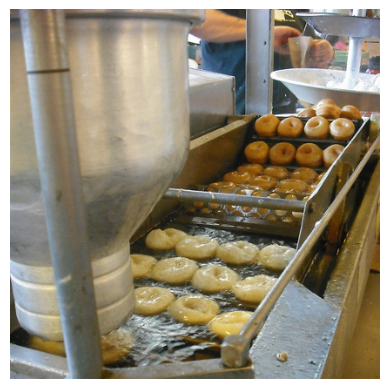

In [4]:
image = Image.open("data/subj01/training_split/training_images/train-0002_nsd-00027.png")
plt.axis('off')
plt.imshow(image)

## Visualize default ResNet50 features

Input shape: torch.Size([1, 3, 224, 224])


100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


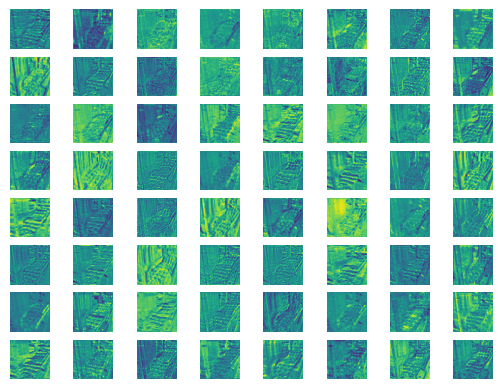

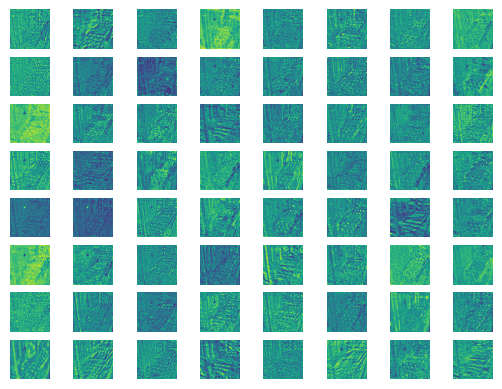

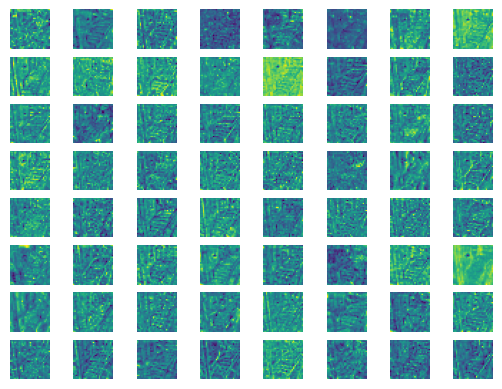

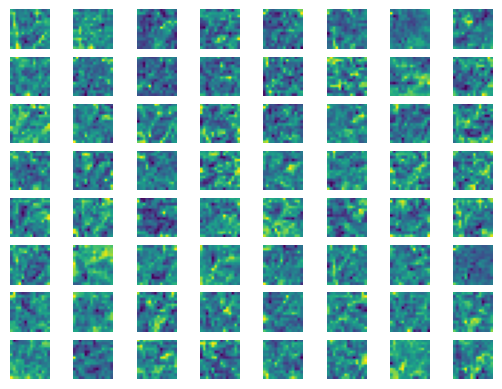

In [5]:
transform = transforms.Compose([
    transforms.Resize((224,224)), # resize the images to 224x224 pixels
    transforms.ToTensor(), # convert the images to a PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize the images color channels
])

transformed_input = transform(image).unsqueeze(0)

print("Input shape: " + str(transformed_input.shape))

output = feature_extractor(transformed_input)

for layer in tqdm(output):
    f, axarr = plt.subplots(8, 8)
    for j in range(64):
        axarr[j // 8, j % 8].axis('off')
        axarr[j // 8, j % 8].imshow(output[layer].detach().numpy()[0][j])

## FPN ResNet50 backbone

In [6]:
fpn = FeaturePyramidNetwork([64, 128, 256, 512], 128)

## Visualize FPN ResNet50 features

Input shape: torch.Size([1, 3, 224, 224])


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


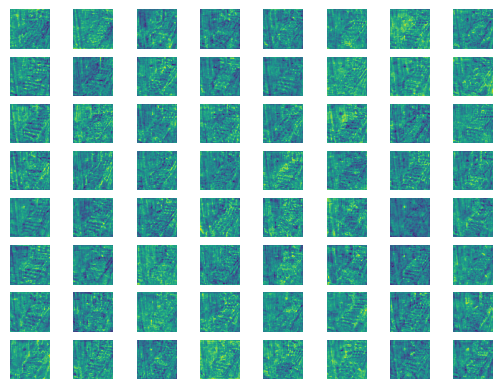

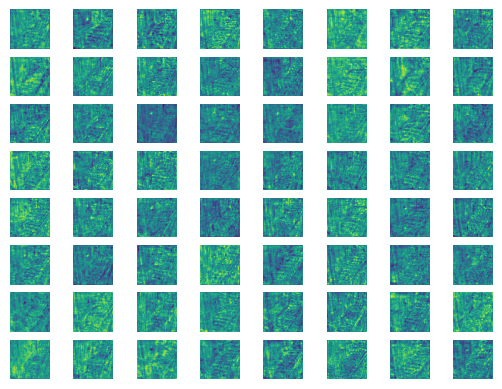

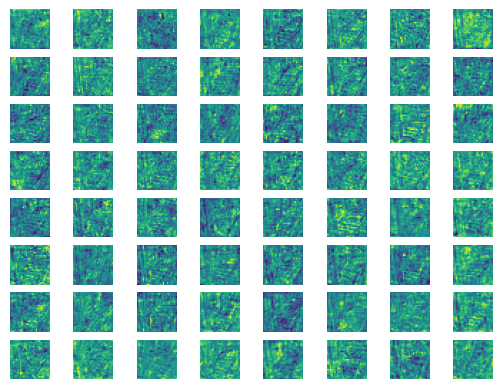

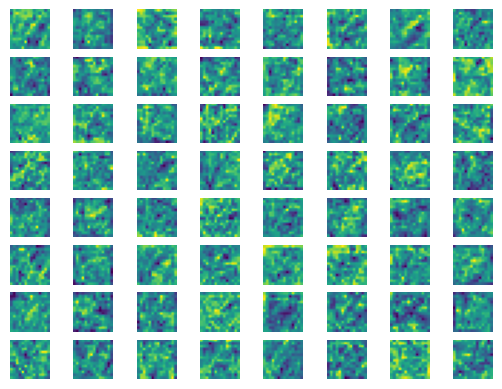

In [7]:
transform = transforms.Compose([
    transforms.Resize((224,224)), # resize the images to 224x224 pixels
    transforms.ToTensor(), # convert the images to a PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize the images color channels
])

transformed_input = transform(image).unsqueeze(0)

print("Input shape: " + str(transformed_input.shape))

output = feature_extractor(transformed_input)
output = fpn(output)

for layer in tqdm(output):
    f, axarr = plt.subplots(8, 8)
    for j in range(64):
        axarr[j // 8, j % 8].axis('off')
        axarr[j // 8, j % 8].imshow(output[layer].detach().numpy()[0][j])